In [1]:
import os
import pandas as pd
os.chdir('/home/bohdan/studies/sem8/mpr/mpr/lab3-openmp/measurements')

In [2]:
df = pd.read_csv('fk_results.csv')

In [3]:
df_speedup = df.apply(lambda x: df.iloc[0] / x, axis=1)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_barplot(df, x, title, ylabel, xlabel):
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = sns.color_palette("muted", n_colors=len(df.columns))

    for column, color in zip(df, colors):
        if type(x) == str and column == x:
            continue
        sns.barplot(x=x, y=column, data=df,
                label=column.replace('_', ' '), color=color)

    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.legend(ncol=2, loc="upper right", frameon=True)

Text(0, 0.5, 'Time (s)')

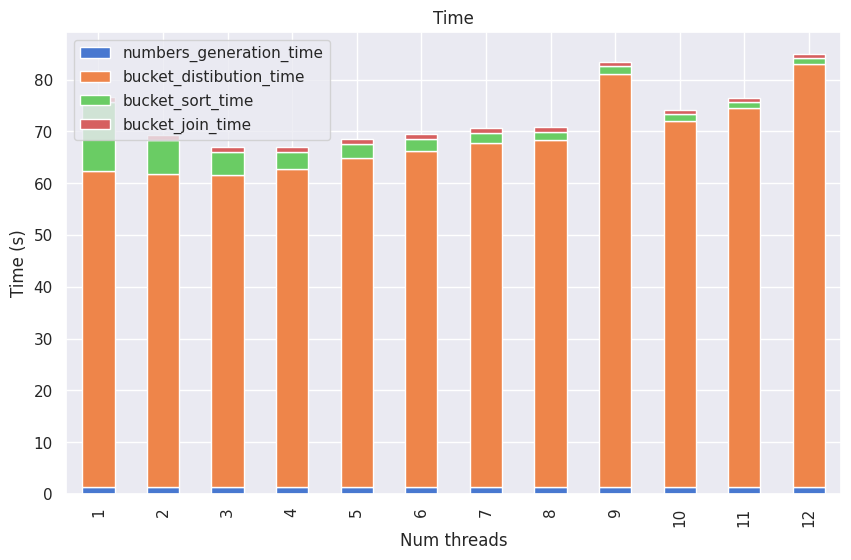

In [5]:
# for each row plots a histogram, where 1. column is main histogram and other are laying on top of it. 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10, 6))



df['Num threads'] = df.index + 1
colors = sns.color_palette("muted", n_colors=len(df.columns))
df.drop('total_time', axis=1).plot.bar(ax=ax, x='Num threads', color=colors, stacked=True)

ax.set_title('Time')
ax.set_ylabel('Time (s)')


Text(0.5, 0, 'Number of threads')

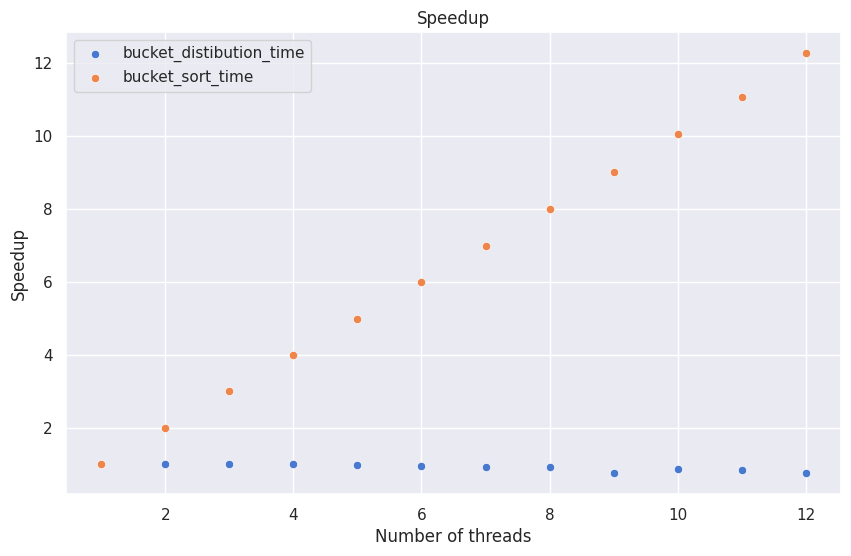

In [6]:
fig, axs = plt.subplots(1, figsize=(10, 6))
sns.scatterplot(data=df_speedup, x=df_speedup.index + 1, y="bucket_distibution_time", color=colors[0], label='bucket_distibution_time')
sns.scatterplot(data=df_speedup, x=df_speedup.index + 1, y="bucket_sort_time", color=colors[1], label='bucket_sort_time')
axs.set_title('Speedup')
axs.set_ylabel('Speedup')
axs.set_xlabel('Number of threads')


In [7]:
# df_bucket_size_small = pd.read_csv('bucket_size_test.csv')
# df_bucket_size_small['initial_bucket_size'] = df_bucket_size_small.index + 10
# df_bucket_size_small['initial_bucket_size'] = df_bucket_size_small.index + 10
# df_bucket_size_small = df_bucket_size_small.iloc[:-10, :]

Text(0, 0.5, 'Time (s)')

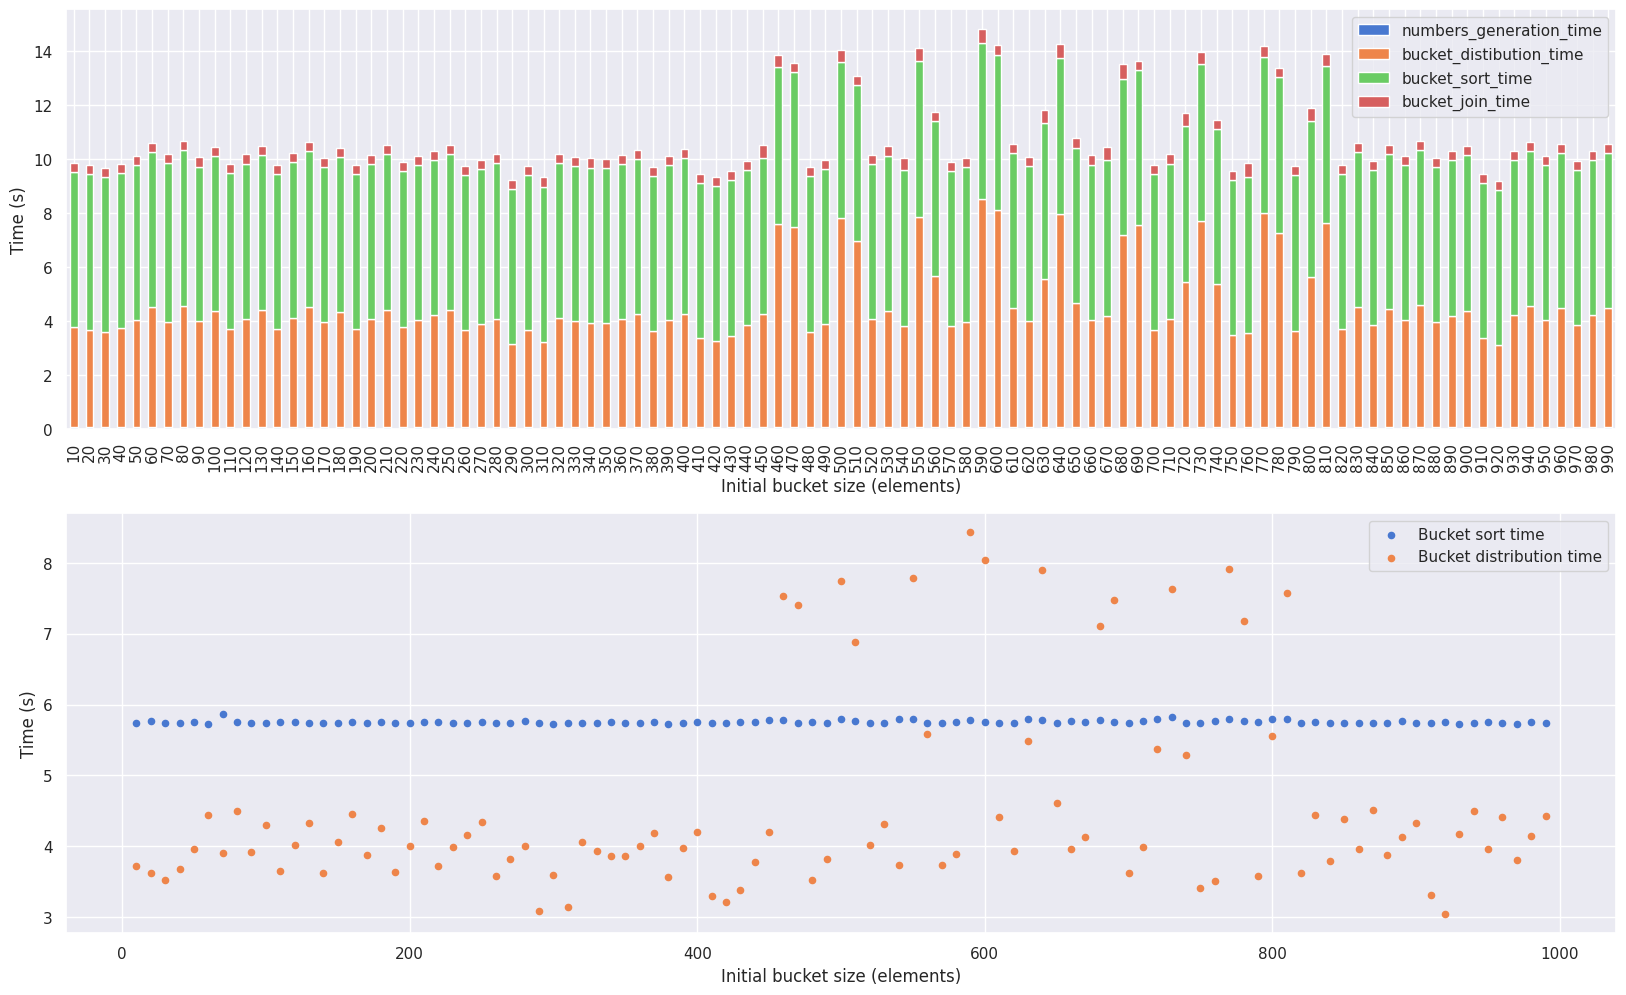

In [8]:
fig, (axs, axs1) = plt.subplots(2, 1, figsize=(20, 12))
df_bucket_size = pd.read_csv('1e6_bst.csv')
df_bucket_size['initial_bucket_size'] = 10 * (df_bucket_size.index + 1)
colors = sns.color_palette("muted", n_colors=len(df_bucket_size.columns))
df_bucket_size.drop('total_time', axis=1).plot.bar(ax=axs, x='initial_bucket_size', color=colors, stacked=True)

df_bucket_size.plot.scatter(ax=axs1, x='initial_bucket_size', y='bucket_sort_time', color=colors[0], label="Bucket sort time")
df_bucket_size.plot.scatter(ax=axs1, x='initial_bucket_size', y='bucket_distibution_time', color=colors[1], label="Bucket distribution time")

axs.set_xlabel('Initial bucket size (elements)')
axs.set_ylabel('Time (s)')
axs1.set_xlabel('Initial bucket size (elements)')
axs1.set_ylabel('Time (s)')